## Звіт до практичної роботи №5

### Виконала: студентка групи  22-ICT

#### Гупалік Анастасія

Практичий завдання (Python):
1. Реалізуйте функцію counting sont (array_to_sort), яка сортує список апгау to sort за допомогою алгоритму сортування підрахунком. Яхідний масив апгау то сорт містить лише невід'ємні цілі числа
2. Реалзуйте функцю radix sort(array to sort), яка сортує список аппаy to sort за допомогою алгоритму сортування за розрядами. Вхідний масив array to sort містить лише невід'ємні цілі числа.
3. Напишіть програму, яка зчитує список чисел з клавіатури та сортує його за допомогою обох аноритмів. Виведіть відсортований список.
4. Порівняйте ефективність алгоритмів Counting Sort ta Radix Sort на списках різноя довжини та з різним діапоном значень. Виміряйте час виконання кожного алгоритму та побудуйте графік залежності часу виконання від розміру та діапазону значень
списку.
5. "Ва бажанням) Модифікуйте функцію counting_sort(array to sort) для сортування масиву, який містить від'ємні цілі числа


In [3]:
def counting_sort(array_to_sort):
    if not array_to_sort:
        return []

    max_val = max(array_to_sort)
    count = [0] * (max_val + 1)

    for num in array_to_sort:
        count[num] += 1

    sorted_arr = []
    for i in range(len(count)):
        sorted_arr.extend([i] * count[i])

    return sorted_arr

mylist = [64, 34, 25, 12, 22, 11, 90, 5]

sorted_list = counting_sort(mylist)
print(sorted_list)

[5, 11, 12, 22, 25, 34, 64, 90]


In [6]:
def counting_sort_for_radix(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(n):
        arr[i] = output[i]

def radix_sort(array_to_sort):
    if not array_to_sort:
        return []

    max_val = max(array_to_sort)

    exp = 1
    while max_val // exp > 0:
        counting_sort_for_radix(array_to_sort, exp)
        exp *= 10

    return array_to_sort

mylist = [64, 34, 25, 12, 22, 11, 90, 5]

sorted_list = radix_sort(mylist)
print(sorted_list)

[5, 11, 12, 22, 25, 34, 64, 90]


In [7]:
def main():
    try:
        user_input = input("Введіть список невід'ємних цілих чисел через пробіл: ")
        unsorted_list = [int(x) for x in user_input.split()]

        if any(x < 0 for x in unsorted_list):
            print("Будь ласка, введіть тільки невід'ємні числа для базових версій алгоритмів.")
            return

        print(f"\nВхідний список: {unsorted_list}")

        c_sorted = counting_sort(unsorted_list.copy())
        print(f"Counting Sort:  {c_sorted}")

        r_sorted = radix_sort(unsorted_list.copy())
        print(f"Radix Sort:     {r_sorted}")

    except ValueError:
        print("Помилка: введіть коректні цілі числа.")

if __name__ == "__main__":
    main()


Вхідний список: [23, 23, 58, 890, 987, 456, 673, 38, 84, 4]
Counting Sort:  [4, 23, 23, 38, 58, 84, 456, 673, 890, 987]
Radix Sort:     [4, 23, 23, 38, 58, 84, 456, 673, 890, 987]


Вимірювання часу виконання...
Size: 100, Counting: 0.00071s, Radix: 0.00010s
Size: 1000, Counting: 0.00100s, Radix: 0.00106s
Size: 5000, Counting: 0.00116s, Radix: 0.00584s
Size: 10000, Counting: 0.00149s, Radix: 0.01235s


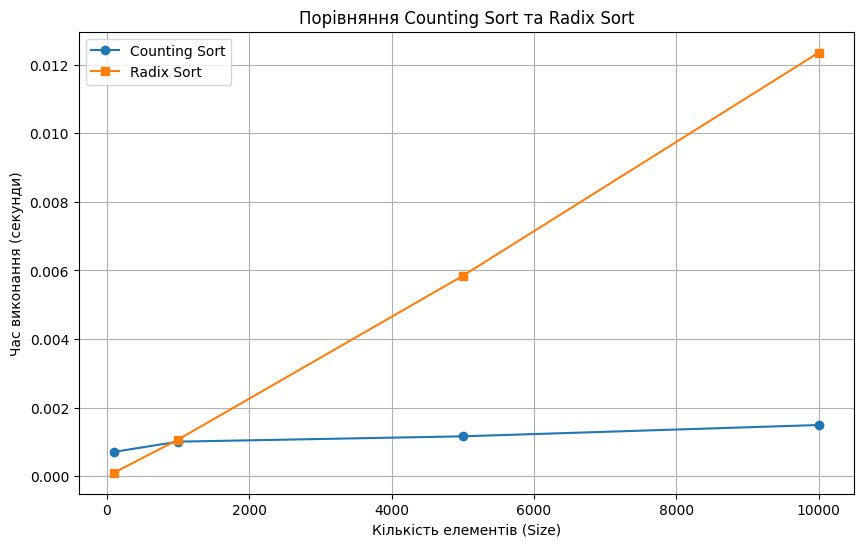

In [8]:
import time
import random
import matplotlib.pyplot as plt

def measure_time(sort_function, data):
    start_time = time.time()
    sort_function(data.copy())
    return time.time() - start_time

def compare_algorithms():
    list_sizes = [100, 1000, 5000, 10000]
    ranges = [100, 1000, 100000]

    results = {'Counting Sort': [], 'Radix Sort': [], 'Sizes': []}

    print("Вимірювання часу виконання...")

    for size in list_sizes:
        data = [random.randint(0, 10000) for _ in range(size)]

        t_counting = measure_time(counting_sort, data)
        t_radix = measure_time(radix_sort, data)

        results['Counting Sort'].append(t_counting)
        results['Radix Sort'].append(t_radix)
        results['Sizes'].append(size)

        print(f"Size: {size}, Counting: {t_counting:.5f}s, Radix: {t_radix:.5f}s")
    plt.figure(figsize=(10, 6))
    plt.plot(results['Sizes'], results['Counting Sort'], label='Counting Sort', marker='o')
    plt.plot(results['Sizes'], results['Radix Sort'], label='Radix Sort', marker='s')

    plt.title('Порівняння Counting Sort та Radix Sort')
    plt.xlabel('Кількість елементів (Size)')
    plt.ylabel('Час виконання (секунди)')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_algorithms()

### Запитання:
1. Який з реалізованих вами алгоритмів виявився ефективнішим на практиці? Чи збігасться це з теоретичною оцінкою складності?
2. Чому Radix Sort називають "цифровим" сортуванням?
3. В яких випадках використання Сounting Sort alio Radix Sort може бути недоцільним?

### Відповіді на запитання
1. Який алгоритм ефективніший і чи збігається це з теорією?
- На практиці для менших діапазонів чисел (коли різниця між max і min мала) Counting Sort працює швидше, оскільки він простіший (менше накладних витрат на виклики функцій).
- Якщо числа дуже великі (наприклад, мільйони), але їх кількість невелика, Counting Sort стає неефективним через величезні витрати пам'яті на масив підрахунку. Тут краще працює Radix Sort.
- Це збігається з теорією: Counting Sort має складність $O(n + k)$, де $k$ — діапазон значень. Якщо $k$ велике, алгоритм стає повільним.
2. Чому Radix Sort називають "цифровим" сортуванням?Тому що він не порівнює числа цілком (як 5 > 3), а обробляє їх поциферно (по розрядах) — спочатку сортує за останнім розрядом (одиниці), потім за передостаннім (десятки) і так далі. Слово "Radix" перекладається як "основа системи числення" (розряд).
3. В яких випадках використання Counting Sort або Radix Sort може бути недоцільним?
- Для дробових чисел (float): Ці алгоритми працюють з цілими числами (або потребують складних модифікацій).
- Великий діапазон значень (Range): Якщо у вас всього 10 чисел, але це [1, 1000000000], Counting Sort створить масив на мільярд елементів, що "з'їсть" всю пам'ять (Memory Error).
- Мала кількість елементів: Для дуже малих списків (наприклад, 20 елементів) звичайний QuickSort або Insertion Sort може бути швидшим через відсутність додаткових виділень пам'яті.